<a href="https://colab.research.google.com/github/mahuthu/Omdena-Liberia-Chapter/blob/main/Evaluation_of_pivot_data_Liberia_DHSdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Set path
path_file =('/pivot_data_Liberia_DHSdata.csv')
df = pd.read_csv(path_file)

In [ ]:
df.shape

(76, 443)

In [ ]:
df.info

<bound method DataFrame.info of                Name  Year  Children overweight  \
0              Bomi  2013                  6.5   
1              Bomi  2019                  1.8   
2              Bong  2013                  2.8   
3              Bong  2019                  7.5   
4          Gbarpolu  2013                  1.7   
..              ...   ...                  ...   
71    North Central  2022                  NaN   
72    North Western  2022                  NaN   
73    South Central  2022                  NaN   
74  South Eastern A  2022                  NaN   
75  South Eastern B  2022                  NaN   

    Children overweight for their age  Children severely stunted  \
0                                 0.0                       15.3   
1                                 0.9                        9.1   
2                                 1.2                       14.6   
3                                 0.6                       11.4   
4                                 0.4                        6.9   
..                                ...                        ...   
71                                NaN                        NaN   
72                                NaN                        NaN   
73                                NaN                        NaN   
74                                NaN                        NaN   
75                                NaN                        NaN   

    Children severely underweight  Children severely wasted  Children stunted  \
0                             4.0                       3.4              33.1   
1                             4.1                       2.7              32.4   
2                             6.2                       2.9              34.7   
3                             0.9                       1.1              37.4   
4                             1.8                       4.8              25.1   
..                            ...                       ...               ...   
71                            NaN                       NaN               NaN   
72                            NaN                       NaN               NaN   
73                            NaN                       NaN               NaN   
74                            NaN                       NaN               NaN   
75                            NaN                       NaN               NaN   

    Children underweight  Children wasted  ...  \
0                   19.7              8.8  ...   
1                   14.2              5.7  ...   
2                   17.4              7.2  ...   
3                    9.3              2.8  ...   
4                   10.8              6.5  ...   
..                   ...              ...  ...   
71                   NaN              NaN  ...   
72                   NaN              NaN  ...   
73                   NaN              NaN  ...   
74                   NaN              NaN  ...   
75                   NaN              NaN  ...   

    Population using surface water_df11  Population using tanker truck_df11  \
0                                  18.3                                 0.2   
1                                   3.4                                 0.0   
2                                  17.2                                 0.0   
3                                   8.0                                 0.2   
4                                  28.3                                 0.0   
..                                  ...                                 ...   
71                                  7.3                                 0.0   
72                                 10.4                                 0.0   
73                                 19.9                                 0.0   
74                                 24.9                                 0.0   
75                                 12.8                                 0.0   

    Population using water 

In [ ]:
#Duplicates in the dataset

len(df[df.duplicated()])

0

<Axes: >

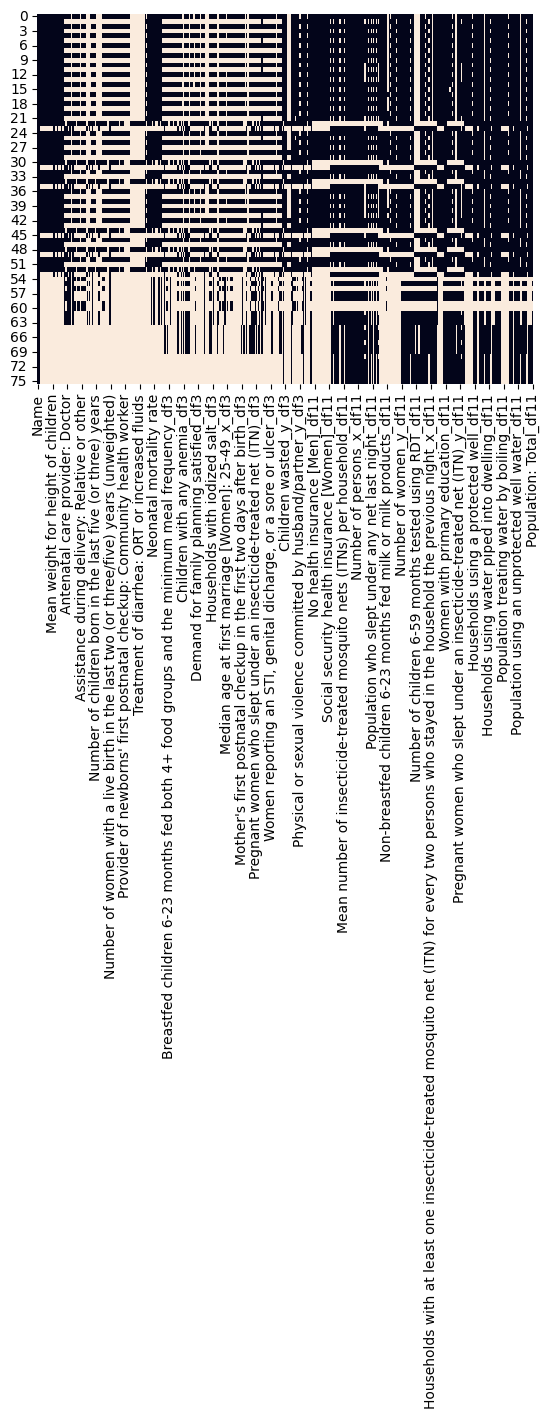

In [ ]:
# Heatmap to show the null values present in the dataset

sns.heatmap(df.isnull(), cbar=False)

In [ ]:
# To find the missing value percentage

missing_percentage = (df.isnull().sum() / len(df)) * 100
pd.set_option('display.max_columns', None)
print(missing_percentage)

Name                                                                                0.000000
Year                                                                                0.000000
Children overweight                                                                36.842105
Children overweight for their age                                                  36.842105
Children severely stunted                                                          36.842105
                                                                                     ...    
Population with unknown or missing information on round trip time to water_df11    13.157895
Population with water 30 minutes or less away round trip_df11                      13.157895
Population with water more than 30 minutes away round trip_df11                    13.157895
Population with water on the premises_df11                                         13.157895
Population: Total_df11                                                

In [ ]:
# To find the missing value percentage under each column

for col, percentage in missing_percentage.items():
    print(f"{col} : {percentage:.2f}% missing values")

Name : 0.00% missing values
Year : 0.00% missing values
Children overweight : 36.84% missing values
Children overweight for their age : 36.84% missing values
Children severely stunted : 36.84% missing values
Children severely underweight : 36.84% missing values
Children severely wasted : 36.84% missing values
Children stunted : 36.84% missing values
Children underweight : 36.84% missing values
Children wasted : 36.84% missing values
Mean Body Mass Index (BMI) for women : 36.84% missing values
Mean height for age of children : 36.84% missing values
Mean weight for age of children : 36.84% missing values
Mean weight for height of children : 36.84% missing values
Number of women : 28.95% missing values
Number of women (unweighted) : 28.95% missing values
Women who are mildly thin according to BMI (17.0-18.4) : 36.84% missing values
Women who are moderately thin according to BMI (<17.0) : 28.95% missing values
Women who are obese according to BMI (>=30.0) : 36.84% missing values
Women who 

**Total Percentage of Missing Values in the Dataset**


In [ ]:
# Total percentage of missing values in the dataset

total_missing_percentage = (df.isnull().sum().sum() / (df.shape[0] * df.shape[1])) * 100
print(f"Total percentage of missing values in the DataFrame: {total_missing_percentage:.2f}%")

Total percentage of missing values in the DataFrame: 43.89%


**Columns Sorted by the Percentage of Missing Values**

In [ ]:
def display_sorted_dataframe(df, sort_column, ascending=False):
    pd.set_option('display.max_rows', None)  # Set option to display all rows
    sorted_df = df.sort_values(by=sort_column, ascending=ascending)
    print(sorted_df)
    pd.reset_option('display.max_rows')  # Reset option to default

result_df = pd.DataFrame({'Column': missing_percentage.index, 'Missing Percentage': missing_percentage.values})

# Using the function to display sorted values without truncation
display_sorted_dataframe(result_df, 'Missing Percentage', ascending=False)

                                                Column  Missing Percentage
43               Child took antibiotic drugs for fever           92.105263
95        Treatment of diarrhea: don't know or missing           92.105263
187  Physical or sexual violence committed by husba...           92.105263
38     Assistance during delivery: Other health worker           92.105263
145  Ever experienced physical violence since age 1...           92.105263
87             Treatment of diarrhea: Increased fluids           92.105263
45   Children with ARI for whom advice or treatment...           92.105263
52   Number of children born in the last five (or t...           92.105263
53   Number of children born in the last five (or t...           92.105263
56   Number of children with symptoms of ARI born i...           92.105263
57   Number of children with symptoms of ARI born i...           92.105263
94             Treatment of diarrhea: Zinc supplements           92.105263
30        Antenatal care 